In this example we:
1. Initialise environment. A rectangular environment of size 2 x 1 meters. 
2. Add walls. Dividing the environment into two equal rooms. 
3. Add Agent. Place the Agent at coordinates (0.5,0.5). Set the speed scale of the agent to be 20 cm/s.
4. Add place cells. 100 Gaussian threshold place cells. Set the radius to 40 cm. Set their wall geometry to "line_of_sight". Set the location of the last place cells to be near the middle of the doorway at coordinates(1.1,0.5). Set the max firing rate of these place cells to 10 Hz and the min firing rate (e.g. baseline) of 0.1 Hz. 
5. Add boundary vector cells. 30 of them. 
6. Simulate. For 10 minutes of random motion with a timestep of dt=10 ms. 
7. Plot trajectory. Plot final 30 seconds from t=4min30 to t=5mins seconds overlayed onto a heatmap of the trajectory over the full period. 
8. Plot timeseries. For 12 randomly chosen boundary vector cells. From t_start = 0 s to t_end = 60 s. Include spikes. 
9. Plot place cells. Show a scatter plot of the centres of the place cells. 
10. Plot rate maps. For 3 randomly chosen place cells. Then, below this, plot a rate map of the same 3 place cells but as calculated using the firing-rate-weighted position historgram. Include spikes on the latter rate maps. 
11. Display the BVC rate maps along with their receptive fields plotted in polar coordinates. 
Despite the complexity of the above simulation it requires only ~40 lines of code and takes ~1.5 minutes to run on a laptop (or just 5 seconds whith dt=200 ms, which is still stable).

In [1]:
#Import ratinabox
import sys
sys.path.append('../')
from ratinabox import *

import numpy as np

In [2]:
# 1 Initialise environment.
Env = Environment(
    params = {'aspect':2,
               'scale':1})

# 2 Add walls. 
Env.add_wall([[1,0],[1,0.35]])
Env.add_wall([[1,0.65],[1,1]])

# 3 Add Agent.
Ag = Agent(Env)
Ag.pos = np.array([0.5,0.5])
Ag.speed_mean = 0.2

# 4 Add place cells. 
PCs = PlaceCells(Ag,
                 params={'n':100,
                         'description':'gaussian_threshold',
                         'widths':0.40,
                         'wall_geometry':'line_of_sight',
                         'max_fr':10,
                         'min_fr':0.1})
PCs.place_cell_centres[-1] = np.array([1.1,0.5])

# 5 Add boundary vector cells.
BVCs = BoundaryVectorCells(Ag,
                params = {'n':30,})

# 6 Simulate. 
dt = 10e-3 
T = 10*60
from tqdm import tqdm #gives time bar
for i in tqdm(range(int(T/dt))):
    Ag.update(dt=dt)
    PCs.update()
    BVCs.update()

100%|██████████| 60000/60000 [01:39<00:00, 600.71it/s]


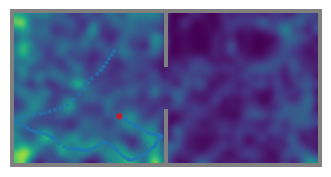

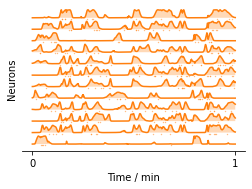

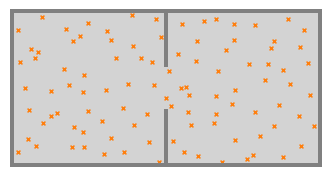

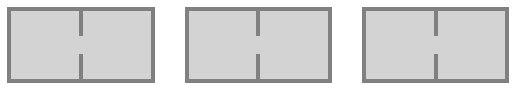

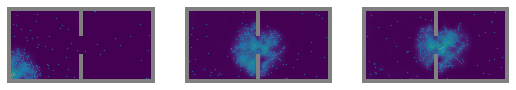

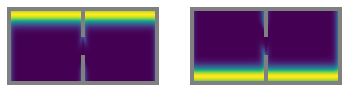

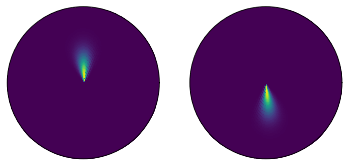

In [3]:
# 7 Plot trajectory. 
fig, ax = Ag.plot_position_heatmap()
fig, ax = Ag.plot_trajectory(t_start=50,t_end=60,fig=fig,ax=ax)

# 8 Plot timeseries. 
fig, ax = BVCs.plot_rate_timeseries(t_start=0,t_end=60,chosen_neurons='12',spikes=True)

# 9 Plot place cells. 
fig, ax = PCs.plot_place_cell_locations()
# 10 Plot rate maps. 
fig, ax = PCs.plot_rate_map(chosen_neurons='3',method='groundtruth')
fig, ax = PCs.plot_rate_map(chosen_neurons='3',method='history',spikes=True)

# 11 Display BVC rate maps and polar receptive fields
fig, ax = BVCs.plot_rate_map(chosen_neurons='2')
fig, ax = BVCs.plot_BVC_receptive_field(chosen_neurons='2')
